In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA


In [2]:
def compute_return(y, r_type="log", h=1):
    
    # exclude first h observations, h for horizon, n is the size of observations used
    # e.g. compute five-step cumulative returns for the first data in S_T need the T_0-(n+4) observation 
    y2 = y[h:]
    # exclude last h observations
    y1 = y[:-h]
    
    if r_type == "log":
        ret = np.concatenate(([np.nan]*h, 100 * (np.log(y2) - np.log(y1))))
    else:
        ret = np.concatenate(([np.nan]*h, 100 * (y2-y1)/y1))
        
    return ret

In [3]:
import yfinance as yf

msft = yf.Ticker("^GDAXI")

hist = msft.history(start = '2022-12-30',end = '2024-02-15')

In [4]:
data_close_price = hist.drop(columns=["Open","High","Low","Volume","Dividends","Stock Splits"])

In [5]:
for i in range(5):
   data_close_price ["ret"+str(i+1)] = compute_return(data_close_price["Close"].values, h=i+1)

In [6]:
data_close_price

,Close,ret1,ret2,ret3,ret4,ret5
Date,,,,,,
2022-12-30 00:00:00+01:00,13923.589844,NaN,NaN,NaN,NaN,NaN
2023-01-02 00:00:00+01:00,14069.259766,1.040775,NaN,NaN,NaN,NaN
2023-01-03 00:00:00+01:00,14181.669922,0.795802,1.836577,NaN,NaN,NaN
2023-01-04 00:00:00+01:00,14490.780273,2.156232,2.952035,3.992809,NaN,NaN
2023-01-05 00:00:00+01:00,14436.309570,-0.376607,1.779625,2.575427,3.616202,NaN
...,...,...,...,...,...,...
2024-02-08 00:00:00+01:00,16963.830078,0.247119,-0.408331,0.352957,0.269282,0.619648
2024-02-09 00:00:00+01:00,16926.500000,-0.220299,0.026820,-0.628630,0.132658,0.048983
2024-02-12 00:00:00+01:00,17037.349609,0.652753,0.432454,0.679573,0.024123,0.785411


In [7]:
data_cumret = data_close_price.drop(columns=["Close"]).dropna()

In [8]:
data_cumret

,ret1,ret2,ret3,ret4,ret5
Date,,,,,
2023-01-06 00:00:00+01:00,1.196103,0.819496,2.975728,3.771530,4.812305
2023-01-09 00:00:00+01:00,1.243505,2.439608,2.063001,4.219233,5.015035
2023-01-10 00:00:00+01:00,-0.123315,1.120190,2.316293,1.939686,4.095918
2023-01-11 00:00:00+01:00,1.166204,1.042889,2.286394,3.482497,3.105890
2023-01-12 00:00:00+01:00,0.735782,1.901986,1.778671,3.022176,4.218279
...,...,...,...,...,...
2024-02-08 00:00:00+01:00,0.247119,-0.408331,0.352957,0.269282,0.619648
2024-02-09 00:00:00+01:00,-0.220299,0.026820,-0.628630,0.132658,0.048983
2024-02-12 00:00:00+01:00,0.652753,0.432454,0.679573,0.024123,0.785411


In [9]:
due1_data_train = data_cumret[:221]
due1_data_train

,ret1,ret2,ret3,ret4,ret5
Date,,,,,
2023-01-06 00:00:00+01:00,1.196103,0.819496,2.975728,3.771530,4.812305
2023-01-09 00:00:00+01:00,1.243505,2.439608,2.063001,4.219233,5.015035
2023-01-10 00:00:00+01:00,-0.123315,1.120190,2.316293,1.939686,4.095918
2023-01-11 00:00:00+01:00,1.166204,1.042889,2.286394,3.482497,3.105890
2023-01-12 00:00:00+01:00,0.735782,1.901986,1.778671,3.022176,4.218279
...,...,...,...,...,...
2023-11-09 00:00:00+01:00,0.804006,1.310618,1.420692,1.069299,1.370296
2023-11-10 00:00:00+01:00,-0.772559,0.031447,0.538060,0.648134,0.296741
2023-11-13 00:00:00+01:00,0.723434,-0.049125,0.754881,1.261494,1.371568


In [10]:
due2_data_train = data_cumret[:226]
due2_data_train

,ret1,ret2,ret3,ret4,ret5
Date,,,,,
2023-01-06 00:00:00+01:00,1.196103,0.819496,2.975728,3.771530,4.812305
2023-01-09 00:00:00+01:00,1.243505,2.439608,2.063001,4.219233,5.015035
2023-01-10 00:00:00+01:00,-0.123315,1.120190,2.316293,1.939686,4.095918
2023-01-11 00:00:00+01:00,1.166204,1.042889,2.286394,3.482497,3.105890
2023-01-12 00:00:00+01:00,0.735782,1.901986,1.778671,3.022176,4.218279
...,...,...,...,...,...
2023-11-16 00:00:00+01:00,0.243797,1.096667,2.837245,3.560679,2.788120
2023-11-17 00:00:00+01:00,0.836129,1.079926,1.932796,3.673374,4.396808
2023-11-20 00:00:00+01:00,-0.112067,0.724062,0.967860,1.820729,3.561307


In [11]:
#prepare expanding samples before 2024
data_train_list = []
due1_data_points = 221
for i in range (7):
    due_data = data_cumret.iloc[:due1_data_points].copy()
    data_train_list.append(due_data)
    due1_data_points +=5
    
print(len(data_train_list))


7


In [12]:
print(data_train_list[6])

                               ret1      ret2      ret3      ret4      ret5
Date                                                                       
2023-01-06 00:00:00+01:00  1.196103  0.819496  2.975728  3.771530  4.812305
2023-01-09 00:00:00+01:00  1.243505  2.439608  2.063001  4.219233  5.015035
2023-01-10 00:00:00+01:00 -0.123315  1.120190  2.316293  1.939686  4.095918
2023-01-11 00:00:00+01:00  1.166204  1.042889  2.286394  3.482497  3.105890
2023-01-12 00:00:00+01:00  0.735782  1.901986  1.778671  3.022176  4.218279
...                             ...       ...       ...       ...       ...
2023-12-21 00:00:00+01:00 -0.273071 -0.340934  0.221184 -0.382905 -0.387627
2023-12-22 00:00:00+01:00  0.112355 -0.160716 -0.228579  0.333540 -0.270550
2023-12-27 00:00:00+01:00  0.214604  0.326959  0.053888 -0.013975  0.548144
2023-12-28 00:00:00+01:00 -0.242316 -0.027712  0.084644 -0.188428 -0.256290
2023-12-29 00:00:00+01:00  0.299462  0.057147  0.271751  0.384106  0.111035

[251 rows x

In [13]:
#data_train_list[0].index = pd.DatetimeIndex(data_train_list[0].index).to_period('D')

In [14]:
for i in range(len(data_train_list)):
    # Convert the index to datetime format
    data_train_list[i].index = pd.DatetimeIndex(data_train_list[i].index).to_period('D')


/var/folders/dd/ghzh11c55_5czyfq85wdrrvc0000gn/T/ipykernel_47926/672054319.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data_train_list[i].index = pd.DatetimeIndex(data_train_list[i].index).to_period('D')


In [15]:
due1_data_train = data_train_list[0]

In [16]:
due2_data_train = data_train_list[1]
due2_data_train

,ret1,ret2,ret3,ret4,ret5
Date,,,,,
2023-01-06,1.196103,0.819496,2.975728,3.771530,4.812305
2023-01-09,1.243505,2.439608,2.063001,4.219233,5.015035
2023-01-10,-0.123315,1.120190,2.316293,1.939686,4.095918
2023-01-11,1.166204,1.042889,2.286394,3.482497,3.105890
2023-01-12,0.735782,1.901986,1.778671,3.022176,4.218279
...,...,...,...,...,...
2023-11-16,0.243797,1.096667,2.837245,3.560679,2.788120
2023-11-17,0.836129,1.079926,1.932796,3.673374,4.396808
2023-11-20,-0.112067,0.724062,0.967860,1.820729,3.561307


In [18]:
import statsmodels.api as sm

arma_mod_ret2 = sm.tsa.ARIMA(due1_data_train["ret2"], order=(2,0,0))
arma_res_ret2 = arma_mod_ret2.fit()
print(arma_res_ret2.summary())

                               SARIMAX Results                                
Dep. Variable:                   ret2   No. Observations:                  221
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -298.329
Date:                Tue, 02 Apr 2024   AIC                            604.658
Time:                        21:32:46   BIC                            618.251
Sample:                    01-06-2023   HQIC                           610.147
                         - 11-15-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0679      0.093      0.731      0.464      -0.114       0.250
ar.L1          0.6827      0.065     10.434      0.000       0.554       0.811
ar.L2         -0.3786      0.059     -6.426      0.0

Text(0, 0.5, 'Residuals')

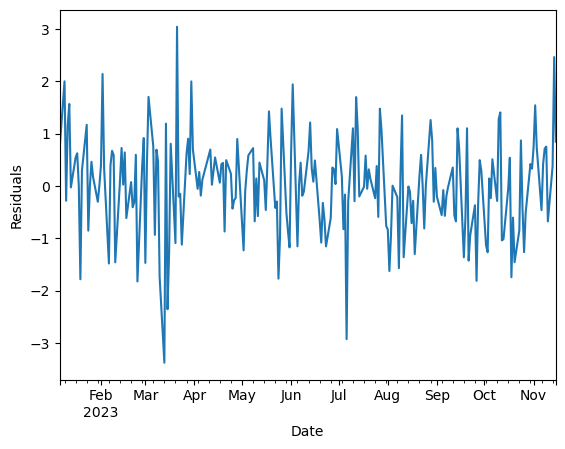

In [19]:
residuals_ret2 = arma_res_ret2.resid
residuals_ret2.plot()
plt.ylabel('Residuals')

<Axes: xlabel='Date'>

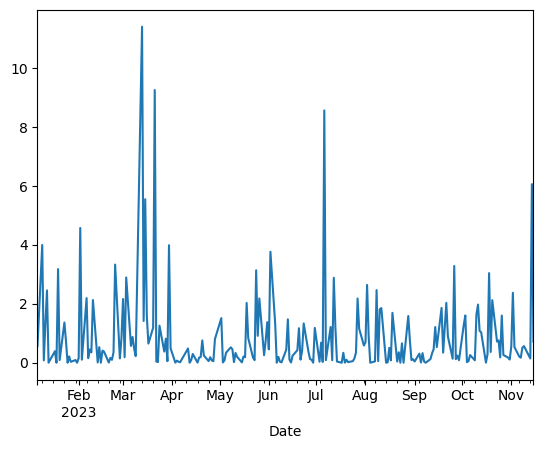

In [20]:
squered_residuals_ret2 = np.square(residuals_ret2)
squered_residuals_ret2.plot()

In [21]:
tau = [.025, .25, .5, .75, .975]
pred_baseline = np.zeros((5,5))
#
#for i in range(5):
#    ret_str = "ret"+str(i+1)
#
#    pred_empirical[i,:] = data_cumre[ret_str].quantile([.025, .25, .5, .75, .975])

In [22]:
#prepare lags to fit quantile regression 

In [23]:
due1_ret2 = due1_data_train["ret2"]

due1_lag1_ret2 = due1_ret2[:-1]
due1_lag1_ret2

Date
2023-01-06    0.819496
2023-01-09    2.439608
2023-01-10    1.120190
2023-01-11    1.042889
2023-01-12    1.901986
                ...   
2023-11-08    0.616686
2023-11-09    1.310618
2023-11-10    0.031447
2023-11-13   -0.049125
2023-11-14    2.464012
Freq: D, Name: ret2, Length: 220, dtype: float64

In [24]:
due1_lag2_ret2 = due1_ret2[:-2]
due1_lag2_ret2

Date
2023-01-06    0.819496
2023-01-09    2.439608
2023-01-10    1.120190
2023-01-11    1.042889
2023-01-12    1.901986
                ...   
2023-11-07   -0.241319
2023-11-08    0.616686
2023-11-09    1.310618
2023-11-10    0.031447
2023-11-13   -0.049125
Freq: D, Name: ret2, Length: 219, dtype: float64

In [25]:
due1_ret2_ar2_df = pd.concat([due1_ret2,due1_lag1_ret2,due1_lag2_ret2], axis=1)

due1_ret2_ar2_df.columns = ['ret2', 'ret2_lag1','ret2_lag2']
due1_ret2_ar2_df = due1_ret2_ar2_df.iloc[::-1]
due1_ret2_ar2_df

,ret2,ret2_lag1,ret2_lag2
Date,,,
2023-11-15,2.593448,NaN,NaN
2023-11-14,2.464012,2.464012,NaN
2023-11-13,-0.049125,-0.049125,-0.049125
2023-11-10,0.031447,0.031447,0.031447
2023-11-09,1.310618,1.310618,1.310618
...,...,...,...
2023-01-12,1.901986,1.901986,1.901986
2023-01-11,1.042889,1.042889,1.042889
2023-01-10,1.120190,1.120190,1.120190


In [26]:
due1_ret2_ar2_df['ret2_lag1']=due1_ret2_ar2_df['ret2_lag1'].shift(-1)
due1_ret2_ar2_df['ret2_lag2']=due1_ret2_ar2_df['ret2_lag2'].shift(-2)
due1_ret2_ar2_df

,ret2,ret2_lag1,ret2_lag2
Date,,,
2023-11-15,2.593448,2.464012,-0.049125
2023-11-14,2.464012,-0.049125,0.031447
2023-11-13,-0.049125,0.031447,1.310618
2023-11-10,0.031447,1.310618,0.616686
2023-11-09,1.310618,0.616686,-0.241319
...,...,...,...
2023-01-12,1.901986,1.042889,1.120190
2023-01-11,1.042889,1.120190,2.439608
2023-01-10,1.120190,2.439608,0.819496


In [27]:
due1_ret2_ar2_df.dropna()
due1_ret2_ar2_df

,ret2,ret2_lag1,ret2_lag2
Date,,,
2023-11-15,2.593448,2.464012,-0.049125
2023-11-14,2.464012,-0.049125,0.031447
2023-11-13,-0.049125,0.031447,1.310618
2023-11-10,0.031447,1.310618,0.616686
2023-11-09,1.310618,0.616686,-0.241319
...,...,...,...
2023-01-12,1.901986,1.042889,1.120190
2023-01-11,1.042889,1.120190,2.439608
2023-01-10,1.120190,2.439608,0.819496


In [28]:
#Fit quantile regresion model 
import statsmodels.formula.api as smf
tau = [.025, .25, .5, .75, .975]
estimated_values = []

due_date= due1_ret2_ar2_df.head(1)
for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due1_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due1_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2
print(due1_estimated_values_df) 

               0.025     0.250    0.500     0.750     0.975
Date                                                       
2023-11-15  0.606897  0.883859  1.65859  2.506393  3.827436


In [29]:
#2 submission due 

In [30]:
due2_data_train = data_train_list[1]
due2_data_train

,ret1,ret2,ret3,ret4,ret5
Date,,,,,
2023-01-06,1.196103,0.819496,2.975728,3.771530,4.812305
2023-01-09,1.243505,2.439608,2.063001,4.219233,5.015035
2023-01-10,-0.123315,1.120190,2.316293,1.939686,4.095918
2023-01-11,1.166204,1.042889,2.286394,3.482497,3.105890
2023-01-12,0.735782,1.901986,1.778671,3.022176,4.218279
...,...,...,...,...,...
2023-11-16,0.243797,1.096667,2.837245,3.560679,2.788120
2023-11-17,0.836129,1.079926,1.932796,3.673374,4.396808
2023-11-20,-0.112067,0.724062,0.967860,1.820729,3.561307


In [31]:
due2_ret2 = due2_data_train["ret2"]

due2_lag1_ret2 = due2_ret2[:-1]

due2_lag2_ret2 = due2_ret2[:-2]

due2_ret2_ar2_df = pd.concat([due2_ret2,due2_lag1_ret2,due2_lag2_ret2], axis=1)

due2_ret2_ar2_df.columns = ['ret2', 'ret2_lag1','ret2_lag2']
due2_ret2_ar2_df = due2_ret2_ar2_df.iloc[::-1]
due2_ret2_ar2_df

,ret2,ret2_lag1,ret2_lag2
Date,,,
2023-11-22,0.354625,NaN,NaN
2023-11-21,-0.117097,-0.117097,NaN
2023-11-20,0.724062,0.724062,0.724062
2023-11-17,1.079926,1.079926,1.079926
2023-11-16,1.096667,1.096667,1.096667
...,...,...,...
2023-01-12,1.901986,1.901986,1.901986
2023-01-11,1.042889,1.042889,1.042889
2023-01-10,1.120190,1.120190,1.120190


In [32]:
due2_ret2_ar2_df['ret2_lag1']=due2_ret2_ar2_df['ret2_lag1'].shift(-1)
due2_ret2_ar2_df['ret2_lag2']=due2_ret2_ar2_df['ret2_lag2'].shift(-2)
due2_ret2_ar2_df

,ret2,ret2_lag1,ret2_lag2
Date,,,
2023-11-22,0.354625,-0.117097,0.724062
2023-11-21,-0.117097,0.724062,1.079926
2023-11-20,0.724062,1.079926,1.096667
2023-11-17,1.079926,1.096667,2.593448
2023-11-16,1.096667,2.593448,2.464012
...,...,...,...
2023-01-12,1.901986,1.042889,1.120190
2023-01-11,1.042889,1.120190,2.439608
2023-01-10,1.120190,2.439608,0.819496


In [33]:
due_date= due2_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due2_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due2_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 2023-11-23
print(due2_estimated_values_df) 

               0.025     0.250     0.500     0.750     0.975
Date                                                        
2023-11-22 -2.219886 -0.752851 -0.239704  0.201327  1.215322


In [34]:
#3 Submission round 

In [35]:
due3_data_train = data_train_list[2]

due3_ret2 = due3_data_train["ret2"]

due3_lag1_ret2 = due3_ret2[:-1]

due3_lag2_ret2 = due3_ret2[:-2]

due3_ret2_ar2_df = pd.concat([due3_ret2,due3_lag1_ret2,due3_lag2_ret2], axis=1)

due3_ret2_ar2_df.columns = ['ret2', 'ret2_lag1','ret2_lag2']
due3_ret2_ar2_df = due3_ret2_ar2_df.iloc[::-1]
due3_ret2_ar2_df

,ret2,ret2_lag1,ret2_lag2
Date,,,
2023-11-29,1.245348,NaN,NaN
2023-11-28,-0.229968,-0.229968,NaN
2023-11-27,-0.177468,-0.177468,-0.177468
2023-11-24,0.448115,0.448115,0.448115
2023-11-23,0.590686,0.590686,0.590686
...,...,...,...
2023-01-12,1.901986,1.901986,1.901986
2023-01-11,1.042889,1.042889,1.042889
2023-01-10,1.120190,1.120190,1.120190


In [36]:
due3_ret2_ar2_df['ret2_lag1']=due3_ret2_ar2_df['ret2_lag1'].shift(-1)
due3_ret2_ar2_df['ret2_lag2']=due3_ret2_ar2_df['ret2_lag2'].shift(-2)

In [37]:
due_date= due3_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due3_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due3_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 
print(due3_estimated_values_df) 

               0.025     0.250     0.500     0.750    0.975
Date                                                       
2023-11-29 -1.988115 -0.596933  0.034124  0.605074  1.62246


In [38]:
#4 Submission round 

In [39]:
due4_data_train = data_train_list[3]

due4_ret2 = due4_data_train["ret2"]

due4_lag1_ret2 = due4_ret2[:-1]

due4_lag2_ret2 = due4_ret2[:-2]

due4_ret2_ar2_df = pd.concat([due4_ret2,due4_lag1_ret2,due4_lag2_ret2], axis=1)

due4_ret2_ar2_df.columns = ['ret2', 'ret2_lag1','ret2_lag2']
due4_ret2_ar2_df = due4_ret2_ar2_df.iloc[::-1]

due4_ret2_ar2_df['ret2_lag1']=due4_ret2_ar2_df['ret2_lag1'].shift(-1)
due4_ret2_ar2_df['ret2_lag2']=due4_ret2_ar2_df['ret2_lag2'].shift(-2)

In [40]:
due_date= due4_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due4_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due4_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 
print(due4_estimated_values_df) 

               0.025     0.250     0.500    0.750     0.975
Date                                                       
2023-12-06 -1.430008 -0.302201  0.205519  0.70417  1.766687


In [41]:
#5 Submission round 

In [42]:
due5_data_train = data_train_list[4]

due5_ret2 = due5_data_train["ret2"]

due5_lag1_ret2 = due5_ret2[:-1]

due5_lag2_ret2 = due5_ret2[:-2]

due5_ret2_ar2_df = pd.concat([due5_ret2,due5_lag1_ret2,due5_lag2_ret2], axis=1)

due5_ret2_ar2_df.columns = ['ret2', 'ret2_lag1','ret2_lag2']
due5_ret2_ar2_df = due5_ret2_ar2_df.iloc[::-1]

due5_ret2_ar2_df['ret2_lag1']=due5_ret2_ar2_df['ret2_lag1'].shift(-1)
due5_ret2_ar2_df['ret2_lag2']=due5_ret2_ar2_df['ret2_lag2'].shift(-2)

In [43]:
due_date= due5_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due5_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due5_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 2023-11-23
print(due5_estimated_values_df) 

               0.025     0.250     0.500     0.750     0.975
Date                                                        
2023-12-13 -1.986884 -0.608328 -0.137733  0.322229  1.289891


In [44]:
#6 Submission round 

In [45]:
due6_data_train = data_train_list[5]

due6_ret2 = due6_data_train["ret2"]

due6_lag1_ret2 = due6_ret2[:-1]

due6_lag2_ret2 = due6_ret2[:-2]

due6_ret2_ar2_df = pd.concat([due6_ret2, due6_lag1_ret2, due6_lag2_ret2], axis=1)

due6_ret2_ar2_df.columns = ['ret2', 'ret2_lag1', 'ret2_lag2']
due6_ret2_ar2_df = due6_ret2_ar2_df.iloc[::-1]

due6_ret2_ar2_df['ret2_lag1'] = due6_ret2_ar2_df['ret2_lag1'].shift(-1)
due6_ret2_ar2_df['ret2_lag2'] = due6_ret2_ar2_df['ret2_lag2'].shift(-2)

In [46]:
due_date= due6_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due6_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due6_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 
print(due6_estimated_values_df) 

               0.025     0.250     0.500     0.750    0.975
Date                                                       
2023-12-20 -1.650607 -0.349259  0.312468  0.931422  2.00435


In [47]:
#7 Submission round 

In [48]:
due7_data_train = data_cumret[:258]
due7_data_train
due7_data_train.index = pd.DatetimeIndex(due7_data_train.index).to_period('D')
due7_data_train

/var/folders/dd/ghzh11c55_5czyfq85wdrrvc0000gn/T/ipykernel_47926/4145338713.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  due7_data_train.index = pd.DatetimeIndex(due7_data_train.index).to_period('D')


,ret1,ret2,ret3,ret4,ret5
Date,,,,,
2023-01-06,1.196103,0.819496,2.975728,3.771530,4.812305
2023-01-09,1.243505,2.439608,2.063001,4.219233,5.015035
2023-01-10,-0.123315,1.120190,2.316293,1.939686,4.095918
2023-01-11,1.166204,1.042889,2.286394,3.482497,3.105890
2023-01-12,0.735782,1.901986,1.778671,3.022176,4.218279
...,...,...,...,...,...
2024-01-04,0.475928,-0.910971,-0.805254,-0.505791,-0.748107
2024-01-05,-0.138977,0.336951,-1.049948,-0.944231,-0.644768
2024-01-08,0.734061,0.595084,1.071012,-0.315887,-0.210170


In [49]:

due7_ret2 = due7_data_train["ret2"]

due7_lag1_ret2 = due7_ret2[:-1]

due7_lag2_ret2 = due7_ret2[:-2]

due7_ret2_ar2_df = pd.concat([due7_ret2, due7_lag1_ret2, due7_lag2_ret2], axis=1)

due7_ret2_ar2_df.columns = ['ret2', 'ret2_lag1', 'ret2_lag2']
due7_ret2_ar2_df = due7_ret2_ar2_df.iloc[::-1]

due7_ret2_ar2_df['ret2_lag1'] = due7_ret2_ar2_df['ret2_lag1'].shift(-1)
due7_ret2_ar2_df['ret2_lag2'] = due7_ret2_ar2_df['ret2_lag2'].shift(-2)


In [50]:
due_date= due7_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due7_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due7_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2
print(due7_estimated_values_df) 

               0.025     0.250     0.500     0.750    0.975
Date                                                       
2024-01-10 -1.481909 -0.260895  0.246788  0.781977  1.82909


In [51]:
#8 Submission round 

In [52]:
due8_data_train = data_cumret[:258+5]
due8_data_train.index = pd.DatetimeIndex(due8_data_train.index).to_period('D')
due8_data_train

/var/folders/dd/ghzh11c55_5czyfq85wdrrvc0000gn/T/ipykernel_47926/2781646534.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  due8_data_train.index = pd.DatetimeIndex(due8_data_train.index).to_period('D')


,ret1,ret2,ret3,ret4,ret5
Date,,,,,
2023-01-06,1.196103,0.819496,2.975728,3.771530,4.812305
2023-01-09,1.243505,2.439608,2.063001,4.219233,5.015035
2023-01-10,-0.123315,1.120190,2.316293,1.939686,4.095918
2023-01-11,1.166204,1.042889,2.286394,3.482497,3.105890
2023-01-12,0.735782,1.901986,1.778671,3.022176,4.218279
...,...,...,...,...,...
2024-01-11,-0.859180,-0.850485,-1.018792,-0.284731,-0.423708
2024-01-12,0.947518,0.088338,0.097034,-0.071273,0.662787
2024-01-15,-0.494137,0.453381,-0.405799,-0.397104,-0.565411


In [53]:

due8_ret2 = due8_data_train["ret2"]

due8_lag1_ret2 = due8_ret2[:-1]

due8_lag2_ret2 = due8_ret2[:-2]

due8_ret2_ar2_df = pd.concat([due8_ret2, due8_lag1_ret2, due8_lag2_ret2], axis=1)

due8_ret2_ar2_df.columns = ['ret2', 'ret2_lag1', 'ret2_lag2']
due8_ret2_ar2_df = due8_ret2_ar2_df.iloc[::-1]

due8_ret2_ar2_df['ret2_lag1'] = due8_ret2_ar2_df['ret2_lag1'].shift(-1)
due8_ret2_ar2_df['ret2_lag2'] = due8_ret2_ar2_df['ret2_lag2'].shift(-2)

In [54]:
due_date= due8_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due8_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due8_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 
print(due8_estimated_values_df) 

               0.025     0.250     0.500     0.750     0.975
Date                                                        
2024-01-17 -2.439076 -1.077028 -0.575168 -0.196193  0.759452


In [55]:
#9 Submission round 

In [56]:
due9_data_train = data_cumret[:258+10]
due9_data_train.index = pd.DatetimeIndex(due9_data_train.index).to_period('D')


/var/folders/dd/ghzh11c55_5czyfq85wdrrvc0000gn/T/ipykernel_47926/3830223387.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  due9_data_train.index = pd.DatetimeIndex(due9_data_train.index).to_period('D')


In [57]:

due9_ret2 = due9_data_train["ret2"]

due9_lag1_ret2 = due9_ret2[:-1]

due9_lag2_ret2 = due9_ret2[:-2]

due9_ret2_ar2_df = pd.concat([due9_ret2, due9_lag1_ret2, due9_lag2_ret2], axis=1)

due9_ret2_ar2_df.columns = ['ret2', 'ret2_lag1', 'ret2_lag2']
due9_ret2_ar2_df = due9_ret2_ar2_df.iloc[::-1]

due9_ret2_ar2_df['ret2_lag1'] = due9_ret2_ar2_df['ret2_lag1'].shift(-1)
due9_ret2_ar2_df['ret2_lag2'] = due9_ret2_ar2_df['ret2_lag2'].shift(-2)

In [58]:
due_date= due9_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due9_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due9_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 
print(due9_estimated_values_df) 

               0.025     0.250     0.500     0.750     0.975
Date                                                        
2024-01-24 -1.481448 -0.388155  0.129163  0.634879  1.659052


In [59]:
#10 Submission round 

In [60]:
due10_data_train = data_cumret[:258+15]
due10_data_train.index = pd.DatetimeIndex(due10_data_train.index).to_period('D')


/var/folders/dd/ghzh11c55_5czyfq85wdrrvc0000gn/T/ipykernel_47926/709765167.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  due10_data_train.index = pd.DatetimeIndex(due10_data_train.index).to_period('D')


In [61]:
due10_ret2 = due10_data_train["ret2"]

due10_lag1_ret2 = due10_ret2[:-1]

due10_lag2_ret2 = due10_ret2[:-2]

due10_ret2_ar2_df = pd.concat([due10_ret2, due10_lag1_ret2, due10_lag2_ret2], axis=1)

due10_ret2_ar2_df.columns = ['ret2', 'ret2_lag1', 'ret2_lag2']
due10_ret2_ar2_df = due10_ret2_ar2_df.iloc[::-1]

due10_ret2_ar2_df['ret2_lag1'] = due10_ret2_ar2_df['ret2_lag1'].shift(-1)
due10_ret2_ar2_df['ret2_lag2'] = due10_ret2_ar2_df['ret2_lag2'].shift(-2)

In [62]:
due_date= due10_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due10_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due10_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 
print(due10_estimated_values_df) 

               0.025     0.250     0.500     0.750     0.975
Date                                                        
2024-01-31 -1.654228 -0.472246  0.079889  0.584843  1.609253


In [63]:
#11 Submission round 

due11_data_train = data_cumret[:258+20]
due11_data_train.index = pd.DatetimeIndex(due11_data_train.index).to_period('D')
due11_ret2 = due11_data_train["ret2"]

due11_lag1_ret2 = due11_ret2[:-1]

due11_lag2_ret2 = due11_ret2[:-2]

due11_ret2_ar2_df = pd.concat([due11_ret2, due11_lag1_ret2, due11_lag2_ret2], axis=1)

due11_ret2_ar2_df.columns = ['ret2', 'ret2_lag1', 'ret2_lag2']
due11_ret2_ar2_df = due11_ret2_ar2_df.iloc[::-1]

due11_ret2_ar2_df['ret2_lag1'] = due11_ret2_ar2_df['ret2_lag1'].shift(-1)
due11_ret2_ar2_df['ret2_lag2'] = due11_ret2_ar2_df['ret2_lag2'].shift(-2)
due_date= due11_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due11_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due11_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2
print(due11_estimated_values_df) 

               0.025     0.250     0.500     0.750     0.975
Date                                                        
2024-02-07 -1.161364 -0.100587  0.441707  1.004164  2.090026


/var/folders/dd/ghzh11c55_5czyfq85wdrrvc0000gn/T/ipykernel_47926/4172719046.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  due11_data_train.index = pd.DatetimeIndex(due11_data_train.index).to_period('D')


In [64]:
#12 Submission round

due12_data_train = data_cumret[:]
due12_data_train.index = pd.DatetimeIndex(due12_data_train.index).to_period('D')
due12_ret2 = due12_data_train["ret2"]

due12_lag1_ret2 = due12_ret2[:-1]

due12_lag2_ret2 = due12_ret2[:-2]

due12_ret2_ar2_df = pd.concat([due12_ret2, due12_lag1_ret2, due12_lag2_ret2], axis=1)

due12_ret2_ar2_df.columns = ['ret2', 'ret2_lag1', 'ret2_lag2']
due12_ret2_ar2_df = due12_ret2_ar2_df.iloc[::-1]

due12_ret2_ar2_df['ret2_lag1'] = due12_ret2_ar2_df['ret2_lag1'].shift(-1)
due12_ret2_ar2_df['ret2_lag2'] = due12_ret2_ar2_df['ret2_lag2'].shift(-2)

due_date= due12_ret2_ar2_df.head(1)
estimated_values = []

for q in tau:
    formula = f'ret2 ~ ret2_lag1 + ret2_lag2'  
    model = smf.quantreg(formula, due12_ret2_ar2_df)
    result = model.fit(q=q)
    predictions = result.predict(due_date)
    # Store the predicted values along with the quantile level
    estimated_values.append(predictions.rename(q))


due12_estimated_values_df = pd.concat(estimated_values, axis=1)

# Print the estimated quantiles for the 2-step ahead R on T_0+2 
print(due12_estimated_values_df)

               0.025     0.250     0.500     0.750     0.975
Date                                                        
2024-02-14 -1.994177 -0.744247 -0.221961  0.187492  1.195642


/var/folders/dd/ghzh11c55_5czyfq85wdrrvc0000gn/T/ipykernel_47926/1194160300.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  due12_data_train.index = pd.DatetimeIndex(due12_data_train.index).to_period('D')


In [65]:
FC_results_list = [due1_estimated_values_df, due2_estimated_values_df, due3_estimated_values_df, due4_estimated_values_df,
                  due5_estimated_values_df, due6_estimated_values_df, due7_estimated_values_df,
                  due8_estimated_values_df, due9_estimated_values_df,
                  due10_estimated_values_df, due11_estimated_values_df, due12_estimated_values_df]
FC_results_df = pd.concat(FC_results_list, axis=0)

In [66]:
FC_results_df

,0.025,0.250,0.500,0.750,0.975
Date,,,,,
2023-11-15,0.606897,0.883859,1.658590,2.506393,3.827436
2023-11-22,-2.219886,-0.752851,-0.239704,0.201327,1.215322
2023-11-29,-1.988115,-0.596933,0.034124,0.605074,1.622460
2023-12-06,-1.430008,-0.302201,0.205519,0.704170,1.766687
2023-12-13,-1.986884,-0.608328,-0.137733,0.322229,1.289891
2023-12-20,-1.650607,-0.349259,0.312468,0.931422,2.004350
2024-01-10,-1.481909,-0.260895,0.246788,0.781977,1.829090
2024-01-17,-2.439076,-1.077028,-0.575168,-0.196193,0.759452
2024-01-24,-1.481448,-0.388155,0.129163,0.634879,1.659052


In [67]:
#forcasting evaluation

In [75]:
realized_data = msft.history(start='2022-12-30', end='2024-02-26')
realized_data["ret2"] = compute_return(realized_data["Close"].values, h=2)

realized_data = realized_data.drop(columns=["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])
realized_data

,ret2
Date,
2022-12-30 00:00:00+01:00,NaN
2023-01-02 00:00:00+01:00,NaN
2023-01-03 00:00:00+01:00,1.836577
2023-01-04 00:00:00+01:00,2.952035
2023-01-05 00:00:00+01:00,1.779625
...,...
2024-02-19 00:00:00+01:00,0.266970
2024-02-20 00:00:00+01:00,-0.286725
2024-02-21 00:00:00+01:00,0.151179


In [76]:
dates =  ['2023-11-15', '2023-11-22', '2023-11-29', '2023-12-06', '2023-12-13', '2023-12-20',
         '2024-01-10', '2024-01-17', '2024-01-24', '2024-01-31', '2024-02-07', '2024-02-14']

# Increment each date by 2 day
dates_2stephead = [(pd.to_datetime(date) + pd.DateOffset(days=2)).strftime('%Y-%m-%d') for date in dates]

# Use the incremented dates to select data from relized_data
realized_T02 = realized_data.loc[dates_2stephead]

In [77]:
realized_T02

,ret2
Date,
2023-11-17 00:00:00+01:00,1.079926
2023-11-24 00:00:00+01:00,0.448115
2023-12-01 00:00:00+01:00,1.419196
2023-12-08 00:00:00+01:00,0.615170
2023-12-15 00:00:00+01:00,-0.087186
2023-12-22 00:00:00+01:00,-0.160716
2024-01-12 00:00:00+01:00,0.088338
2024-01-19 00:00:00+01:00,0.748432
2024-01-26 00:00:00+01:00,0.422263


In [78]:

def quantile_score(q_hat, y, tau):
    scores = []
    for i in range(len(tau)):
        if q_hat[i] > y:
            score = 2 * (1 - tau[i]) * (q_hat[i] - y)
        elif y >= q_hat[i]:
            score = 2 * tau[i] * (y - q_hat[i])
        else:
            score = 0
        scores.append(score)
    return scores

ret_2_scores = []


# Iterate over each submission day (row) in FC_results

for i in range(FC_results_df.shape[0]):
    q_hat = FC_results_df.iloc[i].values
    y = realized_T02.iloc[i].values
    scores = quantile_score(q_hat, y, tau)
    ret_2_scores.append(scores)
    
ret_2_scores

[[array([0.02365146]),
  array([0.09803337]),
  array([0.57866413]),
  array([0.71323333]),
  array([0.13737551])],
 [array([0.13340006]),
  array([0.60048315]),
  array([0.68781981]),
  array([0.37018259]),
  array([0.03836032])],
 [array([0.17036555]),
  array([1.00806423]),
  array([1.38507142]),
  array([1.22118197]),
  array([0.01016322])],
 [array([0.10225889]),
  array([0.45868569]),
  array([0.40965124]),
  array([0.04450013]),
  array([0.05757586])],
 [array([0.09498491]),
  array([0.26057072]),
  array([0.05054718]),
  array([0.20470749]),
  array([0.06885384])],
 [array([0.07449455]),
  array([0.09427139]),
  array([0.47318406]),
  array([0.54606904]),
  array([0.10825332])],
 [array([0.07851236]),
  array([0.17461666]),
  array([0.15844966]),
  array([0.34681923]),
  array([0.08703759])],
 [array([0.15937542]),
  array([0.91273014]),
  array([1.32360055]),
  array([1.41693758]),
  array([0.00055098])],
 [array([0.09518557]),
  array([0.40520923]),
  array([0.29310006]),
  a

In [79]:
columns = ['due1', 'due2', 'due3', 'due4', 'due5', 'due6', 'due7', 'due8', 'due9', 'due10', 'due11', 'due12']
ret_2_scores_df = pd.DataFrame(ret_2_scores).T
ret_2_scores_df.columns = columns
ret_2_scores_df.index = tau

In [80]:
ret_2_scores_df

,due1,due2,due3,due4,due5,due6,due7,due8,due9,due10,due11,due12
0.025,[0.023651459770114448],[0.13340005629108206],[0.17036555076686732],[0.10225888835497501],[0.09498490853809569],[0.07449454934804745],[0.0785123556522504],[0.1593754181182543],[0.0951855749315927],[0.0869841038074514],[0.05940917890849437],[0.1501920376296464]
0.250,[0.09803336603745388],[0.6004831529073863],[1.008064231576339],[0.4586856926873886],[0.26057072078018834],[0.09427139408948387],[0.17461666337706155],[0.91273013635867],[0.4052092325948193],[0.27885012923286506],[0.06370331851347791],[0.8769551334025611]
0.500,[0.5786641266016996],[0.6878198078766172],[1.385071420853212],[0.40965123925117103],[0.05054717887585078],[0.47318405707709493],[0.15844966146524253],[1.323600546502733],[0.2931000590135273],[0.005565224329157681],[0.41488681579103215],[1.2316247699760028]
0.750,[0.7132333281721561],[0.37018258700874984],[1.2211819727106354],[0.04450012591435143],[0.20470749163893265],[0.546069040357563],[0.346819225180947],[1.4169375756156923],[0.10630801291057801],[0.24969427868107835],[0.48867222866623006],[1.2332579787335094]
0.975,[0.1373755147480863],[0.038360323459613675],[0.010163219551919487],[0.05757585608443182],[0.06885384451330843],[0.10825331579076054],[0.08703758821530619],[0.000550975227004336],[0.06183945028485357],[0.07618990997571852],[0.10316031560302999],[0.009298913288501739]


In [81]:
ret_2_scores_df=ret_2_scores_df.astype(float)

In [82]:
ret_2_scores_df

,due1,due2,due3,due4,due5,due6,due7,due8,due9,due10,due11,due12
0.025,0.023651,0.133400,0.170366,0.102259,0.094985,0.074495,0.078512,0.159375,0.095186,0.086984,0.059409,0.150192
0.250,0.098033,0.600483,1.008064,0.458686,0.260571,0.094271,0.174617,0.912730,0.405209,0.278850,0.063703,0.876955
0.500,0.578664,0.687820,1.385071,0.409651,0.050547,0.473184,0.158450,1.323601,0.293100,0.005565,0.414887,1.231625
0.750,0.713233,0.370183,1.221182,0.044500,0.204707,0.546069,0.346819,1.416938,0.106308,0.249694,0.488672,1.233258
0.975,0.137376,0.038360,0.010163,0.057576,0.068854,0.108253,0.087038,0.000551,0.061839,0.076190,0.103160,0.009299


<Axes: >

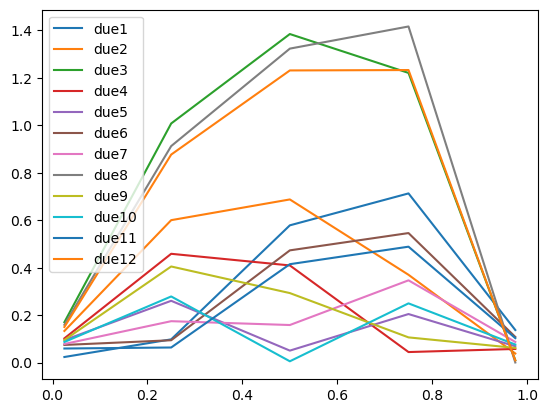

In [83]:
ret_2_scores_df.plot()